In [4]:
import glob
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math 

#Load file names for user. Change here for different user replace 000 or even path as required
filenames = glob.glob("C:/Users/shr7abt/Documents/Location/Data/Geolife Trajectories 1.3/Data/017/Trajectory/200*.plt")

#Read the files
list_of_dfs = [pd.read_csv(filename, skiprows=6, header = None) for filename in filenames]

#put the data from list into one dataframe
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#rename columns
combined_df.columns = ['Latitude', 'Longitude', '0', 'Altitude', 'NumDays', 'Date', 'Time']

#add filename as column to identify each row with its source
for filename in filenames:
    combined_df['Filename'] = filename[-18:]

#add timestamp as columns and then make timestamp as index
combined_df["Timestamp"] = combined_df["Date"].map(str) + " " + combined_df["Time"]
combined_df.Timestamp = pd.to_datetime(combined_df.Timestamp)
combined_df.index = pd.to_datetime(combined_df.Timestamp)

#add weekday number as column
combined_df['Weekday'] = combined_df['Timestamp'].dt.weekday.map(str) + combined_df['Timestamp'].dt.weekday_name

#optional resampling of data on hourly bases
#combined_df = combined_df.resample('H').last()

combined_df.tail()


,Latitude,Longitude,0,Altitude,NumDays,Date,Time,Filename,Timestamp,Weekday
Timestamp,,,,,,,,,,
2009-07-04 12:03:51,39.985032,116.319653,0,177.2,39998.502674,2009-07-04,12:03:51,20090704063554.plt,2009-07-04 12:03:51,5Saturday
2009-07-04 12:04:01,39.985092,116.319722,0,180.4,39998.502789,2009-07-04,12:04:01,20090704063554.plt,2009-07-04 12:04:01,5Saturday
2009-07-04 12:04:44,39.985037,116.319647,0,180.4,39998.503287,2009-07-04,12:04:44,20090704063554.plt,2009-07-04 12:04:44,5Saturday
2009-07-04 12:04:55,39.985003,116.319560,0,180.4,39998.503414,2009-07-04,12:04:55,20090704063554.plt,2009-07-04 12:04:55,5Saturday
2009-07-04 12:08:32,39.984942,116.319663,0,183.7,39998.505926,2009-07-04,12:08:32,20090704063554.plt,2009-07-04 12:08:32,5Saturday


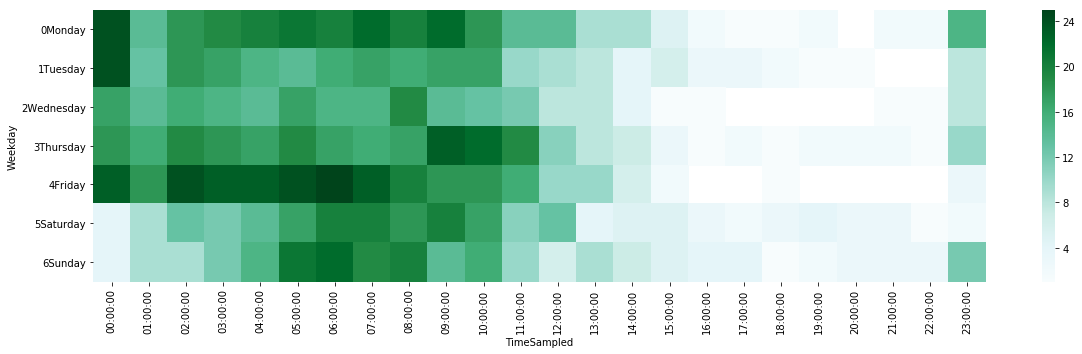

In [5]:
#plot hourly vs weekly data of the user
#Resample data on hourly basis
sampled_df = combined_df.resample('H').last()

#drop column timestamp to avoid confusion as index is also timestamp
sampled_df = sampled_df.drop(['Timestamp'], axis=1)

#extract time from timestamp and add it as a column
sampled_df['TimeSampled'] = sampled_df.index.time

#form a pivot table counting number of latitudes for each weekday for each hour
pivot_df = sampled_df.pivot_table(values='Latitude', index='Weekday',columns='TimeSampled',aggfunc=len)

#draw a plot to visualize hourly trend per weekday for the user
fig, ax = plt.subplots(figsize=(20,5))  
sns.heatmap(pivot_df, cmap='BuGn', ax=ax)

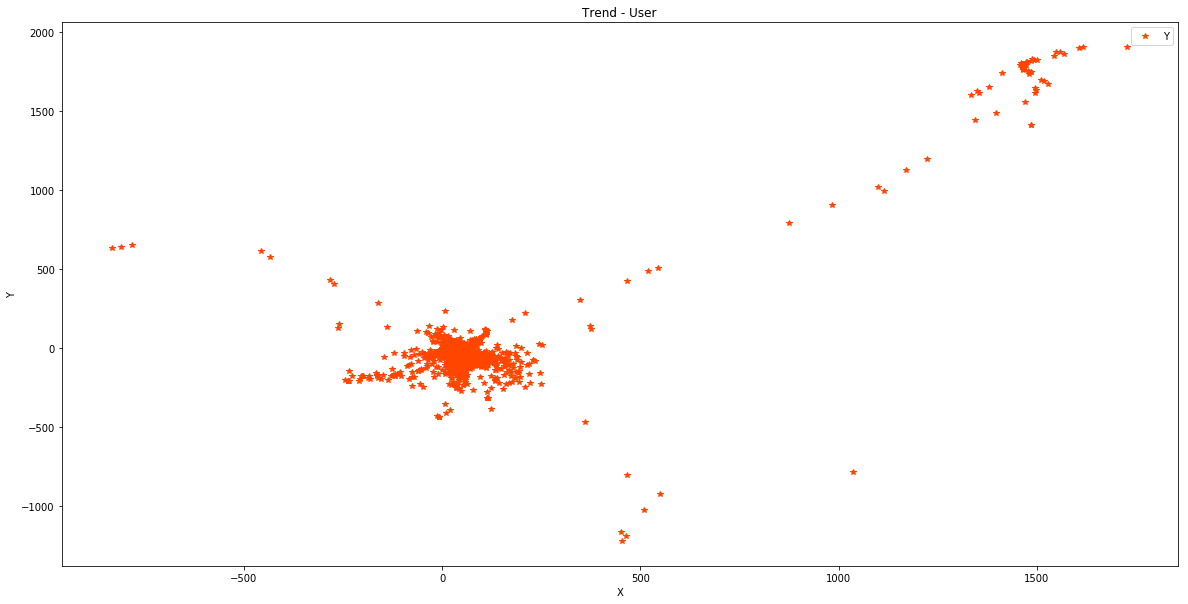

In [17]:
#plot to visualize the location trend of the user
#Sample data hourly and take mean, drop nans, reset index
xy_df = combined_df.resample('H').mean()
xy_df = xy_df.dropna()
xy_df = xy_df.reset_index(drop=True)

#assign the first lat and log as the base for the plot i.e. origin
origin_lat = math.radians(xy_df["Latitude"][0])
origin_lon = math.radians(xy_df["Longitude"][0])

#convert each lat and lon into x and y for the plot w.r.t origin
EARTH_RAD = 6378100
xy_df['X'] = 0.0
xy_df['Y'] = 0.0
for i in range(0, len(xy_df)):
    x = 0
    y = 0
    current_lat = math.radians(xy_df["Latitude"][i])
    current_lon = math.radians(xy_df["Longitude"][i])
    x = ((math.cos(current_lat) + math.cos(origin_lat))/2) * EARTH_RAD * (current_lon - origin_lon) * math.pi / 180
    y = (current_lat - origin_lat)* math.pi/180 * EARTH_RAD
    xy_df.at[i, 'X'] = x
    xy_df.at[i, 'Y'] = y

#plot the x and y's
xy_df.plot(x='X', y= 'Y' , style='*', figsize=(20,10), color='orangered')
plt.title('Trend - User')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

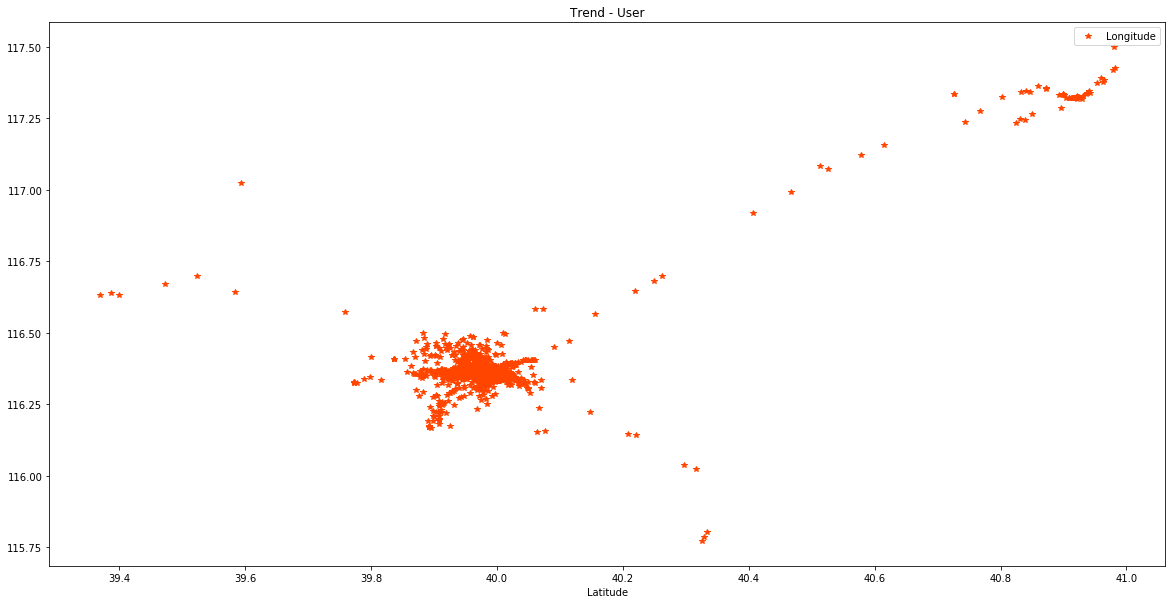

In [19]:
xy_df.plot(x='Latitude', y= 'Longitude' , style='*', figsize=(20,10), color='orangered')
plt.title('Trend - User')
plt.show()

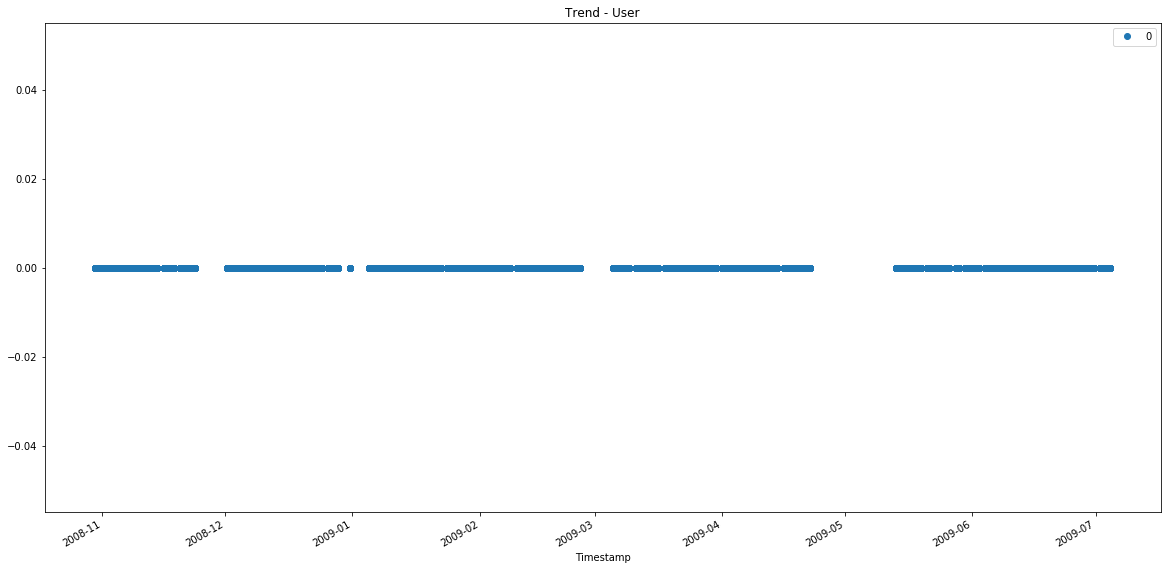

In [7]:
#plot timestamp to visualize the missing data over the period of entire dates of the user
combined_df.plot(x='Timestamp', y= '0' , style='o', figsize=(20,10))
plt.title('Trend - User')
plt.xlabel('Timestamp')
plt.show()